In [1]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler

#Regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn import svm
import xgboost as xgb

#Report
from sklearn.metrics import classification_report

#Validation
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Cargamos y leemos el csv

df1 = pd.read_csv("C:/Users/Daniel/Desktop/csv definitivos/Q3_tweets_24_notendencias_variables.csv", sep = ";")
df2 = pd.read_csv("C:/Users/Daniel/Desktop/csv definitivos/Q3_tweets_25_notendencias_variables.csv", sep = ";")
df3 = pd.read_csv("C:/Users/Daniel/Desktop/csv definitivos/Q1Q3_tweets_24_tendencias_variables.csv", sep = ";")
df4 = pd.read_csv("C:/Users/Daniel/Desktop/csv definitivos/Q1Q3_tweets_25_tendencias_variables.csv", sep = ";")

df1["target"] = 0
df2["target"] = 0
df3["target"] = 1
df4["target"] = 1

del(df1["Unnamed: 0"])
del(df2["Unnamed: 0"])
del(df3["Unnamed: 0"])
del(df4["Unnamed: 0"])

In [3]:
df_train = pd.concat([df1, df3])
df_test = pd.concat([df2, df4])

df_train.drop("start_lifetime", axis = 1, inplace = True)
df_test.drop("start_lifetime", axis = 1, inplace = True)

In [4]:
#Obtenemos train
X = np.asarray(df_train.iloc[:,1:-2])
y = np.asarray(df_train.target)

#Obtenemos test
X_test = df_test.iloc[:, 1:-2]
y_test = df_test.target

In [5]:
df_train.iloc[:, 1:-2]

,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,total_replies,total_interaction,...,tweet_acc_45,tweet_acc_56,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67
0,1,1,5,1,0,1,4.0,3.0,0.0,7.0,...,0,0,1,0,0,0,0,0,0,1
1,1,9,1,1,0,1,1.0,15.0,0.0,16.0,...,0,0,1,0,0,0,0,0,0,1
2,1,9,1,1,0,1,1.0,15.0,0.0,16.0,...,0,0,1,0,0,0,0,0,0,1
3,1,9,1,1,0,1,1.0,15.0,0.0,16.0,...,0,0,1,0,0,0,0,0,0,1
4,1,9,1,1,0,1,1.0,15.0,0.0,16.0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,190,271,211,191,13,17,805.0,1202.0,151.0,2158.0,...,-1,60,67,1,1,0,1,1,36,94
508,219,242,223,219,184,59,555.0,1331.0,43.0,1929.0,...,0,13,-6,60,101,76,57,44,41,30
509,109,143,110,110,23,17,396.0,2464.0,208.0,3068.0,...,1,91,-77,0,0,0,0,1,55,67
510,190,207,241,204,31,145,3144.0,2253.0,282.0,5679.0,...,-133,-157,127,0,0,1,37,51,24,15


In [6]:
df_train

,trend,total_tweets,total_hashtags,total_mentions,total_reply_to,total_url,total_photo,total_retweets,total_likes,total_replies,...,tweet_acc_67,user_count_01,user_count_12,user_count_23,user_count_34,user_count_45,user_count_56,user_count_67,target,hour
0,#carteldesinaloa,1,1,5,1,0,1,4.0,3.0,0.0,...,1,0,0,0,0,0,0,1,0,NaN
1,#corrermehaenseñado,1,9,1,1,0,1,1.0,15.0,0.0,...,1,0,0,0,0,0,0,1,0,NaN
2,#yoelegicorrer,1,9,1,1,0,1,1.0,15.0,0.0,...,1,0,0,0,0,0,0,1,0,NaN
3,#correvivesiente,1,9,1,1,0,1,1.0,15.0,0.0,...,1,0,0,0,0,0,0,1,0,NaN
4,#corrermola,1,9,1,1,0,1,1.0,15.0,0.0,...,1,0,0,0,0,0,0,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,Benzema,190,271,211,191,13,17,805.0,1202.0,151.0,...,67,1,1,0,1,1,36,94,1,8.0
508,Partido Feminista,219,242,223,219,184,59,555.0,1331.0,43.0,...,-6,60,101,76,57,44,41,30,1,6.0
509,Partido Feminista,109,143,110,110,23,17,396.0,2464.0,208.0,...,-77,0,0,0,0,1,55,67,1,7.0
510,Partido Feminista,190,207,241,204,31,145,3144.0,2253.0,282.0,...,127,0,0,1,37,51,24,15,1,8.0


In [7]:
#Estandarizamos los datos
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [8]:
df_metrics = pd.DataFrame(columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])

Feature ranking:
1. feature 9 (0.090269): total_interaction
2. feature 7 (0.085858): total_likes
3. feature 6 (0.071541): total_retweets
4. feature 1 (0.062488): total_hashtags
5. feature 8 (0.056166): total_replies
6. feature 36 (0.050112): user_count_56
7. feature 5 (0.046730): total_photo
8. feature 2 (0.042981): total_mentions
9. feature 4 (0.037042): total_url
10. feature 15 (0.034903): tweet_count_56
11. feature 35 (0.034671): user_count_45
12. feature 37 (0.034125): user_count_67
13. feature 3 (0.031591): total_reply_to
14. feature 16 (0.030914): tweet_count_67
15. feature 0 (0.027799): total_tweets
16. feature 14 (0.024235): tweet_count_45
17. feature 34 (0.023610): user_count_34
18. feature 13 (0.023562): tweet_count_34
19. feature 30 (0.016875): tweet_acc_67
20. feature 33 (0.016409): user_count_23
21. feature 22 (0.016314): tweet_vel_56
22. feature 23 (0.016019): tweet_vel_67
23. feature 21 (0.010659): tweet_vel_45
24. feature 32 (0.010267): user_count_12
25. feature 29 (0.0

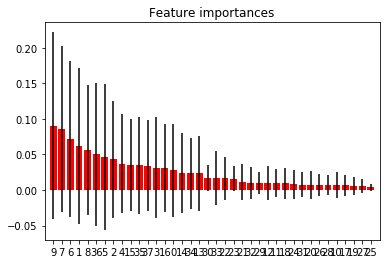

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f):" % (f + 1, indices[f], importances[indices[f]]), df_train.iloc[:,1:-2].columns[indices[f]])
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")

plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# RandomForestClassifier()

In [10]:
#Calculamos los mejores parametros para el modelo
clf = RandomForestClassifier()
clfparam_grid = {"bootstrap"         : [True, False],
                 "max_depth"         : [10, 20, 30, 40, 50, 60, 70, None],
                 "max_features"      : ["auto", "sqrt"],
                 "min_samples_leaf"  : [1, 2, 4],
                 "min_samples_split" : [2, 5, 10],
                 "n_estimators"      : [200, 400, 600]}

clf_search = GridSearchCV(clf, param_grid = clfparam_grid, cv = 3, verbose = 2, n_jobs = -1)
 
model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "RandomForestClassifier",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])


# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

Fitting 3 folds for each of 864 candidates, totalling 2592 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min


KeyboardInterrupt: 

# LogisticRegression()

Fitting 5 folds for each of 490 candidates, totalling 2450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 1024 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1380 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1788 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2215 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 2450 out of 2450 | elapsed:  7.6min finished


Accuracy_score: 0.8272900763358778
------------------------------------
Confusion Matrix:
 [[511 149]
 [ 32 356]]
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       660
           1       0.70      0.92      0.80       388

    accuracy                           0.83      1048
   macro avg       0.82      0.85      0.82      1048
weighted avg       0.85      0.83      0.83      1048



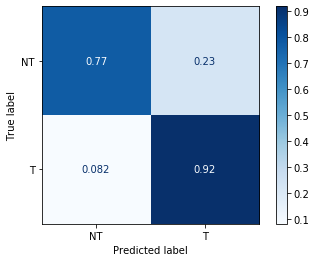

Area bajo la curva:  0.8159852389878164


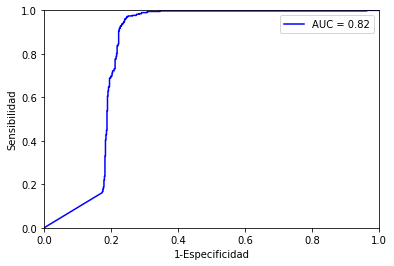

In [11]:
#Calculamos los mejores parametros para el modelo
clf = LogisticRegression()
clfparam_grid = {"C"        : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 "penalty"  : ["l1", "l2"],
                 "max_iter" : list(range(100, 800, 100)),
                 "solver"   : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

clf_search = GridSearchCV(clf, param_grid = clfparam_grid, refit = True, verbose = 3, cv = 5, n_jobs= -1)

# print("Mean Accuracy: %.3f" % clf_search.best_score_)
# print("Config: %s" % clf_search.best_params_)


model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "LogisticRegression",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])


# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

# GaussianNB()

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished


Accuracy_score: 0.7423664122137404
------------------------------------
Confusion Matrix:
 [[486 174]
 [ 96 292]]
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       660
           1       0.63      0.75      0.68       388

    accuracy                           0.74      1048
   macro avg       0.73      0.74      0.73      1048
weighted avg       0.76      0.74      0.75      1048



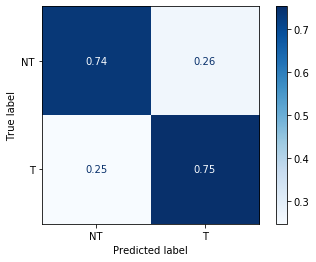

Area bajo la curva:  0.8203295845048422


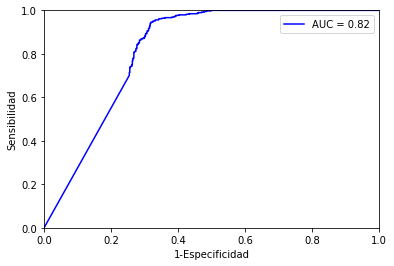

In [12]:
#Calculamos los mejores parametros para el modelo
clf = GaussianNB()
clfparam_grid = {"var_smoothing" : np.logspace(0, -9, num = 100)}
clf_search = GridSearchCV(clf, param_grid = clfparam_grid, cv = 5, verbose = 1, n_jobs= -1)


model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "GaussianNB",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])


# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

# KNeighborsClassifier()


In [ ]:
#Calculamos los mejores parametros para el modelo
clf = KNeighborsClassifier()
clfparam_grid = {"n_neighbors": [3,4,5,6,10],
                 "weights"    : ["uniform", "distance"],
                 "metric"     : ["euclidean", "manhattan"]}

clf_search = GridSearchCV(clf, param_grid = clfparam_grid, verbose = 1, cv = 3, n_jobs = -1 )

model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "KNeighborsClassifier",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])


# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

# DecisionTreeClassifier()

In [ ]:
#Calculamos los mejores parametros para el modelo
clf = DecisionTreeClassifier()
clfparam_grid = {"criterion" : ["gini", "entropy"],
                 "max_depth" : [2,4,6,8,10,12]}

clf_search = GridSearchCV(clf, param_grid = clfparam_grid, refit = True, verbose = 3, cv=5, n_jobs= -1)

 
model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "DecisionTreeClassifier",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])

# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

# SVM

In [ ]:
#Calculamos los mejores parametros para el modelo
clf = svm.SVC()
clfparam_grid = {"C"           : [5, 10, 15],
                 "gamma"       : ["auto", 0.001, 0.00001, 0.000001],
                 "kernel"      : ["rbf", "poly", "linear"],
                 "shrinking"   : [True, False],
                 "probability" : [True, False]}

clf_search = GridSearchCV(clf, param_grid = clfparam_grid, refit = True, verbose = 3, cv = 5, n_jobs = -1)

model_result = clf_search.fit(X, y)
best_model = model_result.best_estimator_
final_model = best_model.fit(X,y)
yhat = final_model.predict(X_test)

print("Accuracy_score:", accuracy_score(y_test, yhat))
print("------------------------------------")
print("Confusion Matrix:\n", confusion_matrix(y_test, yhat))
print("------------------------------------------------------")
print(classification_report(y_test, yhat))

probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

row = {"Model"     : "SVM (Classifier)",
       "Accuracy"  : round(accuracy_score(y_test, yhat), 3),
       "F1-Score"  : round(f1_score(y_test,yhat), 3),
       "Precision" : round(precision_score(y_test, yhat), 3),
       "Recall"    : round(recall_score(y_test, yhat), 3),
       "AUC"       : round(roc_auc, 3)}

df_metrics = pd.concat([df_metrics, pd.DataFrame(row, index = [0])])

# Confussion Matrix
disp = plot_confusion_matrix(final_model, X_test, y_test,
                             display_labels=["NT", "T"],
                             cmap = plt.cm.Blues,
                             normalize = "true")
plt.show()

# Curva ROC
probs = final_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print("Area bajo la curva: ",auc(fpr, tpr))
plt.plot(fpr, tpr, "b", label = "AUC = %0.2f" % roc_auc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend()
plt.ylabel("Sensibilidad")
plt.xlabel("1-Especificidad")
plt.show()

In [ ]:
df_metrics = df_metrics.sort_values("AUC", ascending = False)

In [ ]:
df_metrics.reset_index().drop('index', axis = 1)

In [ ]:
df_metrics.to_csv("metricas_modelos.csv", sep = ";", index = False)